# REGRESIÓN LINEAL

## Modelo: KEYNESIANO

## Paso 1: Analizar asociación entre variables.

1.1. Se realiza un diagrama de dispersión.

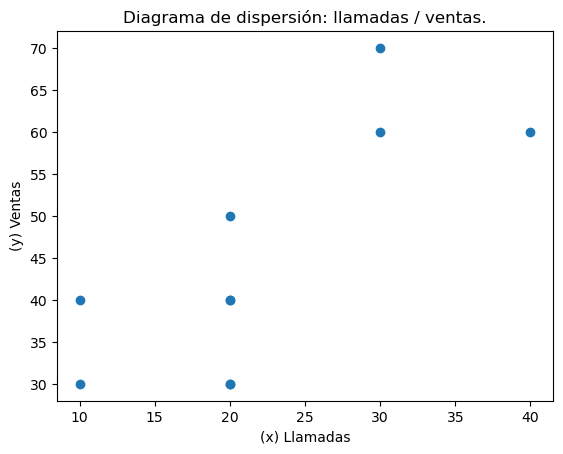

In [1]:
import numpy as np
import matplotlib.pyplot as plt

###---DATOS---###
#ejemplo 11.4 pág. 344 Estadistica aplicada - WEBSTER

x = np.array([20,40,20,30,10,10,20,20,20,30])
y = np.array([30,60,40,60,30,40,40,50,30,70])
eje_x = input('Ingrese el nombre de la variable x: ')
eje_y = input('Ingrese el nombre de la variable y: ')

###---DIAGRAMA DE DISPERSIÓN---###

plt.title('Diagrama de dispersión: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
plt.xlabel('(x) {}'.format(eje_x))
plt.ylabel('(y) {}'.format(eje_y))
plt.scatter(x, y) #gráfico de dispersión
plt.show() #for clean output

1.2. Se calcula e interpretan algunos coeficientes como: error estándar de estimación (Se), correlación bivariada (r), determinación bivariada (R2).

In [9]:
#mean_x = media de x
#mean_y = media de y
#std_x = desviación std. de x
#std_y = desviación std. de y
#SCx = suma de cuadrados de x
#SCy = suma de cuadrados de y
#SCxy = suma de los productos cruzados x, y
#SCE = suma de cuadrados del error
#CME = cuadrado medio del error
#Se = error estandar de estimación
#Sb = error estandar de regresión

mean_x, mean_y = np.mean(x), np.mean(y)
std_x, std_y = np.std(x, ddof=1), np.std(y, ddof=1)
SCx = sum(x ** 2) - ((sum(x) ** 2) / len(x))
SCy = sum(y ** 2) - ((sum(y) ** 2) / len(y))
SCxy = sum(x*y) - (sum(x) * sum(y)) / len(x)

###---CALCULO DEL ERROR ESTÁNDAR DE ESTIMACIÓN (Se)
SCE = SCy - (((SCxy) ** 2) / SCx)
CME = SCE / (len(x) - 2)
Se = np.sqrt(CME)
print('\nSe = {:.3f}'.format(Se))
###---INTERPRETACIÓN DEL ERROR ESTÁNDAR DE ESTIMACIÓN (Se)

###---CALCULO DEL ERROR ESTÁNDAR DE REGRESIÓN (Sb)
Sb = Se / np.sqrt(SCx)
print('\nSb = {:.3f}'.format(Sb))
###---INTERPRETACIÓN DEL ERROR ESTÁNDAR DE REGRESIÓN (Sb)

###---CALCULO DE (r)---###
r = SCxy / np.sqrt(SCx * SCy)
print('\nr = {:.3f}'.format(r))
###---INTERPRETACIÓN DE (r)---###
if r > 0:
    if r > 0.5:
        print('Existe una correlación positiva fuerte entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
    else:
        print('Existe una correlación positiva débil entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
elif r < 0:
    if r < -0.5:
        print('Existe una correlación negativa fuerte entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
    else:
        print('Existe una correlación negativa débil entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
else:
    print('No existe ninguna correlación entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))

###---CALCULO DE (R2)---###
R2 = (SCxy ** 2) / (SCx * SCy)
print('\nR2 = {:.3f}'.format(R2))
###---INTERPRETACION DE (R2)---###
print('El {:.0f}% del cambio en los valores de {} se explica mediante un cambio en los valores de {}.'.format((R2*100), eje_y.lower(), eje_x.lower()))

###---CALCULO DE (t)---###
t = (r * np.sqrt(len(x) - 2)) / (np.sqrt(1 - (r ** 2)))
#print(t)
###---INTERPRETACION DE (t)---###
#¿Cómo sacar el intervalo para la prueba t student?


Se = 9.901

Sb = 0.359

r = 0.759
Existe una correlación positiva fuerte entre llamadas y ventas.

R2 = 0.576
El 58% del cambio en los valores de ventas se explica mediante un cambio en los valores de llamadas.


## Paso 3: Hallar la ecuación y la recta de mejor ajuste.

3.1. Mínimos cuadrados ordinarios: la recta de mejor ajuste

In [6]:
###---LA RECTA DE MEJOR AJUSTE---###

#m
pendiente = SCxy / SCx

#b
interseccion = mean_y - (pendiente * mean_x)

print('La pendiente de la recta de regresión es: {:.2f}.'.format(pendiente))

print('La interseccion de la recta con el eje y ocurre en el punto: (0, {:.2f})'.format(interseccion))

#ecuación de la recta
print('La ecuación de la recta es Y = {:.2f} + {:.2f}X'.format(interseccion, pendiente))

La pendiente de la recta de regresión es: 1.18.
La interseccion de la recta con el eje y ocurre en el punto: (0, 18.95)
La ecuación de la recta es Y = 18.95 + 1.18X


## Paso 4: Grafica de la recta de la regresión lineal.

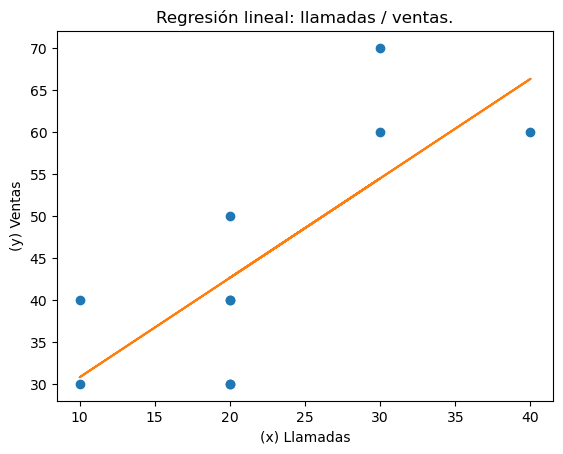

In [7]:
#create basic scatterplot
plt.plot(x, y, 'o') #'o' is for dots; 'ro' is for red dots

#add linear regression line to scatterplot 
plt.title('Regresión lineal: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
plt.xlabel('(x) {}'.format(eje_x))
plt.ylabel('(y) {}'.format(eje_y))
plt.plot(x, pendiente*x+interseccion) #y=m*x+b
plt.show() #for clean output

## Paso 5: Estimación.

Se estima que por cada 45.0 llamadas realizadas, sean vendidas 72.24 copiadoras según la regresión lineal.
Se estima que por cada 65.0 llamadas realizadas, sean vendidas 95.92 copiadoras según la regresión lineal.
Se estima que por cada 32.0 llamadas realizadas, sean vendidas 56.84 copiadoras según la regresión lineal.
Se estima que por cada 23.0 llamadas realizadas, sean vendidas 46.18 copiadoras según la regresión lineal.


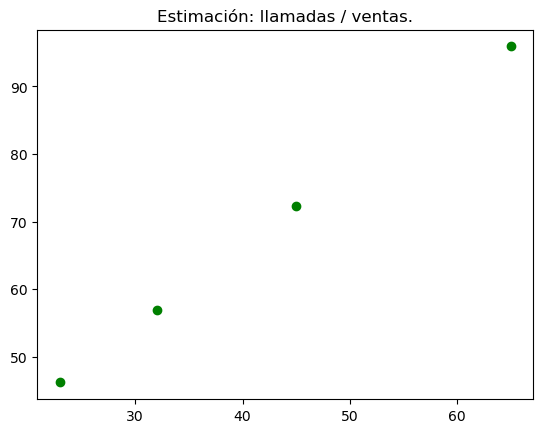

In [8]:
def estimar_valor():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (pendiente * x_estimado) + interseccion
            x.append(x_estimado)
            y.append(y_estimado)
            print('Se estima que por cada {} llamadas realizadas, sean vendidas {:.2f} copiadoras según la regresión lineal.'.format(x_estimado, y_estimado))

    x = np.array(x)
    y = np.array(y)

    #Gráfico
    plt.title('Estimación: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
    plt.plot(x, y, 'go') #'o' is for dots; 'ro' is for red dots

estimar_valor()